In [1]:
import sklearn.manifold

In [2]:
import umap

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl

In [6]:
training_set_fingerprint_address='../../../../results/compound_exploration/[M+H]+_metlin_fingerprints.bin'

In [7]:
training=pd.read_pickle(training_set_fingerprint_address)

In [8]:
training

,InChIKey,cactvs_fingerprint,metlin_adduct_or_nist,cid,fingerprint_array
0,UQTZMGFTRHFAAM-UHFFFAOYSA-N,1100000001110010001100000000000000000000000000...,[M+H]+,6272.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ..."
1,RLAWWYSOJDYHDC-UHFFFAOYSA-N,1110000001111011001110000000000000000000000000...,[M+H]+,3937.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ..."
2,BAWFJGJZGIEFAR-UHFFFAOYSA-N,1110000001111011101111000000001100000000000000...,[M+H]+,925.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ..."
3,BKRGVLQUQGGVSM-UHFFFAOYSA-N,1110000001111011101000000000000000000000000000...,[M+H]+,3938.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ..."
4,LSQZJLSUYDQPKJ-UHFFFAOYSA-N,1110000001111011001110000000000001000000000000...,[M+H]+,2171.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ..."
...,...,...,...,...,...
4049,PMMQOFWSZRQWEV-UHFFFAOYSA-N,1111000001111010001111000000000000000000000000...,[M+H]+,10325960.0,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ..."
4050,XZFSMUXVAYCHFO-UHFFFAOYSA-N,1111000001111111101100000000000000000000000000...,[M+H]+,641596.0,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ..."
4051,RLNIWODKAMVILO-UHFFFAOYSA-N,1110000001110000001100000000000000000000000000...,[M+H]+,54273075.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ..."
4052,NNJVILVZKWQKPM-UHFFFAOYSA-N,1110000001110011001000000000000000000000000000...,[M+H]+,3676.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ..."


In [9]:
X_metlin=np.array(training.fingerprint_array.to_list())

In [10]:
np.shape(X_metlin)

(4040, 881)

In [11]:
hcd_pos_nist_address='../../../../results/compound_exploration/[M+H]+_hcd_cohort_fingerprints.bin'

In [12]:
hcd_pos_nist_panda=pd.read_pickle(hcd_pos_nist_address)

In [13]:
hcd_pos_nist_panda=hcd_pos_nist_panda.reset_index()

In [14]:
X_nist=np.array(hcd_pos_nist_panda.fingerprint_array.to_list())

In [15]:
np.shape(X_nist)

(8298, 881)

In [16]:
X=np.vstack((X_metlin,X_nist))

In [17]:
np.shape(X)

(12338, 881)

In [18]:
cheap_colors=['red' for i in range(4040)] + ['r' for i in range(8298)]
expensive_colors=['red' for i in range(4040)] + [cm.viridis(1-hcd_pos_nist_panda.at[i,'dot_product']) for i in range(8298)]

In [19]:
perplexity=[400,800]
learning_rate=[50,100,200,400,800]
metric='jaccard'
random_state=1337
n_jobs=3
#erplexity=[10]
#earning_rate=[30]

In [20]:
# my_UMAP=umap.UMAP(
#     n_neighbors=n_neighbors,
#     min_dist=min_dist,
#     n_components=n_components,
#     metric=metric,
#     random_state=1337    
# )

In [21]:
# my_fingerprints_embeded=my_UMAP.fit_transform(X)

In [1]:
for i,temp_perplexity in enumerate(perplexity):
    for j,temp_learning in enumerate(learning_rate):
        
        print (f'{i} and {j}')
        
        my_tsne=sklearn.manifold.TSNE(
            perplexity=temp_perplexity,
            learning_rate=temp_learning,
            metric=metric,
            n_jobs=n_jobs,
            random_state=random_state
        )
        my_fingerprints_embeded=my_tsne.fit_transform(X)
        
        s=10
        plt.rcParams['font.family'] = 'Arial'
        plt.rcParams['font.size']=14
        fig,ax=plt.subplots(2,1,figsize=(6.69292, 12),dpi=1200,facecolor='w')
        ax[0].set_title('Training Set')
        ax[0].scatter(
            my_fingerprints_embeded[0:4040,0],
            my_fingerprints_embeded[0:4040,1],
            c=cheap_colors[0:4040],
            alpha=0.1,
            s=s
        )
        ax[0].xaxis.set_visible(False)
        ax[0].yaxis.set_visible(False)
        # norm=mpl.colors.Normalize(vmin=0,vmax=0)
        # sm=plt.cm.ScalarMappable(cmap=plt.get_cmap('red'),norm=norm)
        # plt.colorbar(sm,label='Dot Product',ax=ax[0])
        ax[1].set_title('Training Set and NIST Subset')
        ax[1].scatter(
            my_fingerprints_embeded[0:4040,0],
            my_fingerprints_embeded[0:4040,1],
            c=cheap_colors[0:4040],
            alpha=0.1,
            s=s#,
            #cmap=plt.get_cmap('viridis')
        )
        ax[1].scatter(
            my_fingerprints_embeded[4040:,0],
            my_fingerprints_embeded[4040:,1],
            c=expensive_colors[4040:],
            alpha=0.3,
            s=s#,
            #cmap=plt.get_cmap('viridis')
        )
        norm=mpl.colors.Normalize(vmin=0,vmax=1)
        sm=plt.cm.ScalarMappable(cmap=plt.get_cmap('viridis'),norm=norm)
        plt.colorbar(sm,label='Dot Product',ax=ax[1])
        #fig.suptitle('Predictive Model Confusion Matrices')
        #fig.supylabel('Actual Class')
        #fig.supxlabel('Predicted Class')
        plt.savefig(f'./tsne_hyperparam_test/perplexity_{temp_perplexity}_learning_{temp_learning}.png',
                   facecolor=fig.get_facecolor())
        ##plt.show()
        #plt.savefig('/home/rictuar/coding_projects/fiehn_work/cfmid/cfmid_redo/results/final_figures/submitted_to_manuscript/umap_m+h_hcd_vs_training.eps')

NameError: name 'perplexity' is not defined

IndexError: index 2 is out of bounds for axis 1 with size 2

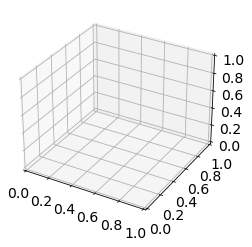

In [23]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(
    my_fingerprints_embeded[0:4040,0],
    my_fingerprints_embeded[0:4040,1],
    my_fingerprints_embeded[0:4040,2],
    c=cheap_colors[0:4040],
    alpha=0.2
)

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
# ax.scatter(
#     my_fingerprints_embeded[0:4040,0],
#     my_fingerprints_embeded[0:4040,1],
#     my_fingerprints_embeded[0:4040,2],
#     c=cheap_colors[0:4040],
#     alpha=0.2
# )
ax.scatter(
    my_fingerprints_embeded[4040:,0],
    my_fingerprints_embeded[4040:,1],
    my_fingerprints_embeded[4040:,2],
    c=expensive_colors[4040:],
    alpha=0.2
)